In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from keras.utils.vis_utils import plot_model
from keras.models import load_model
import modules.deep_model as DeepModel
import modules.model as Model 
import tensorflow as tf
import warnings
import numpy as np
import os

warnings.filterwarnings('ignore')

# Giới thiệu về LSTM Model (ghi dùm)

In [3]:
X_train, y_train = Model.loadData("./data/data/train")
X_train = X_train.fillna("")

X_test, y_test = Model.loadData("./data/data/test")
X_test = X_test.fillna("")

display(X_train, y_train)
display(X_test, y_test)


,raw_comment,normalize_comment,emoji_decode
0,form k đẹp lắm,form không đẹp lắm,
1,Áo Rộng thật sự\nGl nhanh\nChật lươ...,áo rộng thật sự nhanh chật lượng v...,
2,Màu túi hơi tối do với ảnh chụp,màu túi hơi tối do ảnh chụp,
3,Chất liệu vải k ổn lắm,chất liệu vải không ổn lắm,
4,"Mã ""màu đen"" hiện lên áo màu đen, còn ...",mã màu đen hiện lên áo màu đen còn mã...,
...,...,...,...
11359,"Khi bán combo ghi 3 đôi, nhưng nhận chỉ ...",bán combo ghi đôi nhưng nhận chỉ đôi ta...,
11360,"Áo đẹp, from chuẩn. Sẽ ủng hộ tiếp ạ !",áo đẹp from chuẩn sẽ ủng hộ tiếp,
11361,Đặt màu trắng kem thì giao màu xanh đen...,đặt màu trắng kem giao màu xanh đen giao...,expressionless
11362,Đồ chơi tí hon.\nShop nên dừng bán sp ...,đồ chơi tí hon nên dừng bán sản phẩ...,


,label
0,0
1,1
2,0
3,0
4,0
...,...
11359,0
11360,1
11361,0
11362,0


,raw_comment,normalize_comment,emoji_decode
0,Shop bán hàng kỉ quấn đầy đủ. Chất l...,bán hàng kỉ quấn đầy đủ chất lượn...,
1,"Đặt xl, áo ghi xl nhưng lại bé tí tẹo ...",đặt xl áo ghi xl nhưng bé tí tẹo ngang ...,
2,Kẹp rất rất đẹp săn được giá sale h...,kẹp rất rất đẹp săn được giá sale h...,
3,K nghĩ áo đẹp vậy đâu giao hàng nhanh k...,không nghĩ áo đẹp giao hàng nhanh không ...,
4,Hôm nay mới nhận đc nhưng nhìn qua thâ...,hôm nay mới nhận được nhưng nhìn qua...,
...,...,...,...
2837,Mình đặt 2 dây buộc tóc nhưng lại chi...,đặt dây buộc tóc nhưng chỉ nhận đưo...,star slightly_smiling_face slightly_smiling_fa...
2838,"Chất vải đẹp, có vẻ mát, giao hàng nha...",chất vải đẹp có vẻ mát giao hàng nhanh...,
2839,Dây nhìn tạm. K đẹp. Mắc sai dây mình ...,dây nhìn tạm không đẹp mắc sai dây pha...,
2840,Quần đẹp chất lượng ok nhưng chữ ru...,quần đẹp chất lượng ok nhưng chữ cu...,


,label
0,1
1,0
2,1
3,1
4,1
...,...
2837,0
2838,1
2839,0
2840,1


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 79)           283215    
_________________________________________________________________
lstm (LSTM)                  (None, 10)                3600      
_________________________________________________________________
output (Dense)               (None, 2)                 22        
Total params: 286,837
Trainable params: 286,837
Non-trainable params: 0
_________________________________________________________________


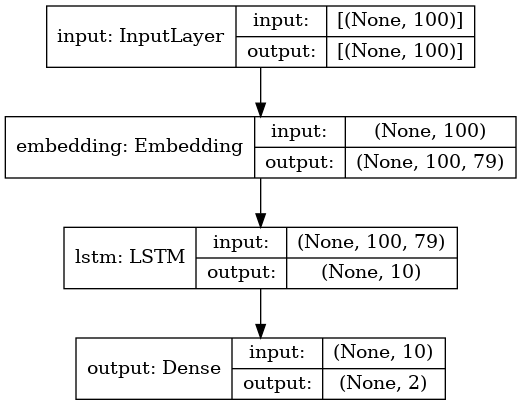

In [4]:
hyperparameters_1 = {
    'pX': X_train['normalize_comment'], 
    'py': y_train, 
    'pnum_words': None, 
    'pseq_length': None,
    'pno_units': 10, 
    'pdropout': 0.2, 
    'pbatch_size': 32, 
    'pepochs': 10, 
    'psave_weights': './models/lstm_model_comments_1.h5'
}

model_1 = DeepModel.SentimentLSTM()
model_1.define(**hyperparameters_1)
model_1.model.summary()
plot_model(model_1.model, to_file='./images/lstm_model_comments_1.png', show_shapes=True, show_layer_names=True)

In [5]:
model_1.fit(**hyperparameters_1)

Epoch 1/10
320/320 [==============================] - 31s 86ms/step - loss: 0.4508 - accuracy: 0.8185 - val_loss: 0.3506 - val_accuracy: 0.8549
Epoch 2/10
320/320 [==============================] - 28s 86ms/step - loss: 0.2847 - accuracy: 0.8943 - val_loss: 0.3400 - val_accuracy: 0.8558
Epoch 3/10
320/320 [==============================] - 26s 80ms/step - loss: 0.2424 - accuracy: 0.9119 - val_loss: 0.3460 - val_accuracy: 0.8681
Epoch 4/10
320/320 [==============================] - 25s 79ms/step - loss: 0.2164 - accuracy: 0.9212 - val_loss: 0.3432 - val_accuracy: 0.8663
Epoch 5/10
320/320 [==============================] - 26s 80ms/step - loss: 0.1960 - accuracy: 0.9278 - val_loss: 0.3669 - val_accuracy: 0.8584
Epoch 6/10
320/320 [==============================] - 26s 82ms/step - loss: 0.1812 - accuracy: 0.9369 - val_loss: 0.3840 - val_accuracy: 0.8593
Epoch 7/10
320/320 [==============================] - 14s 44ms/step - loss: 0.1814 - accuracy: 0.9343 - val_loss: 0.3922 - val_accuracy:

In [6]:
!tensorboard --logdir ./tb_log_sentiment --port 6006

2021-10-29 22:18:10.219562: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2021-10-29 22:18:10.219585: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-10-29 22:18:11.176327: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-29 22:18:11.176710: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2021-10-29 22:18:11.176770: W tensorflow

> **Nhận xét**:
> * Đây là line chart trên accuracy và loss do TensorBoard vẽ ra, với màu xanh là của validation data và cam là training data.
> * Ta thấy kể từ sau epoch đầu tiên thì giữa validation và train bắt đầu có sự khác biệt, chứng tỏ model đang bị overfitting.

Tiếp theo, ta sẽ tokenizer cho test data để tiến hành đánh giá trên test data.

In [7]:
prediction_1 = model_1.predict(X_test['normalize_comment'])
prediction_1

,input,output_proba,output_class
0,bán hàng kỉ quấn đầy đủ chất lượn...,"(4.148319e-06, 0.9999958)",1
1,đặt xl áo ghi xl nhưng bé tí tẹo ngang ...,"(0.9960705, 0.003929518)",0
2,kẹp rất rất đẹp săn được giá sale h...,"(0.809507, 0.19049297)",0
3,không nghĩ áo đẹp giao hàng nhanh không ...,"(0.22817881, 0.7718212)",1
4,hôm nay mới nhận được nhưng nhìn qua...,"(0.99997556, 2.4480925e-05)",0
...,...,...,...
2837,đặt dây buộc tóc nhưng chỉ nhận đưo...,"(0.9999796, 2.0352623e-05)",0
2838,chất vải đẹp có vẻ mát giao hàng nhanh...,"(0.0008592206, 0.99914074)",1
2839,dây nhìn tạm không đẹp mắc sai dây pha...,"(0.9999949, 5.076978e-06)",0
2840,quần đẹp chất lượng ok nhưng chữ cu...,"(0.9882366, 0.011763366)",0


              precision    recall  f1-score   support

    Negative       0.86      0.86      0.86      1410
    Positive       0.87      0.87      0.87      1432

    accuracy                           0.87      2842
   macro avg       0.87      0.87      0.87      2842
weighted avg       0.87      0.87      0.87      2842



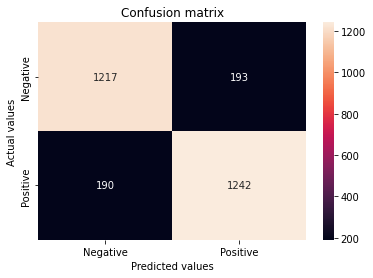

In [8]:
Model.confusionMatrix(y_test, prediction_1['output_class'])

Do ta có áp dụng checkpoint trong model để lưu lại các bộ tham số tốt nhất trong quá trình training, ta có thể lấy bộ tham số mà có validation loss thấp nhất để update trọng số cho model.

In [9]:
model_uw_1 = DeepModel.SentimentLSTM()
model_uw_1.define(**hyperparameters_1)
model_uw_1.model.load_weights("./models/lstm_model_comments_1/weights/02-0.340042.h5")

In [10]:
prediction_uw_1 = model_uw_1.predict(X_test['normalize_comment'])
prediction_uw_1

,input,output_proba,output_class
0,bán hàng kỉ quấn đầy đủ chất lượn...,"(0.00073411025, 0.99926585)",1
1,đặt xl áo ghi xl nhưng bé tí tẹo ngang ...,"(0.9971385, 0.002861474)",0
2,kẹp rất rất đẹp săn được giá sale h...,"(0.9313881, 0.068611994)",0
3,không nghĩ áo đẹp giao hàng nhanh không ...,"(0.011878509, 0.9881215)",1
4,hôm nay mới nhận được nhưng nhìn qua...,"(0.9889897, 0.011010231)",0
...,...,...,...
2837,đặt dây buộc tóc nhưng chỉ nhận đưo...,"(0.9959667, 0.0040333555)",0
2838,chất vải đẹp có vẻ mát giao hàng nhanh...,"(0.010884253, 0.9891158)",1
2839,dây nhìn tạm không đẹp mắc sai dây pha...,"(0.99751866, 0.002481401)",0
2840,quần đẹp chất lượng ok nhưng chữ cu...,"(0.91258466, 0.08741527)",0


              precision    recall  f1-score   support

    Negative       0.85      0.90      0.87      1410
    Positive       0.89      0.84      0.87      1432

    accuracy                           0.87      2842
   macro avg       0.87      0.87      0.87      2842
weighted avg       0.87      0.87      0.87      2842



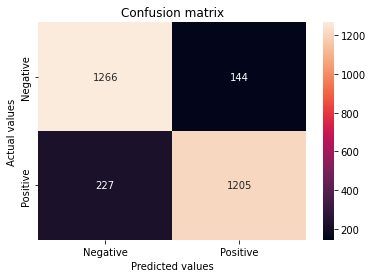

In [11]:
Model.confusionMatrix(y_test, prediction_uw_1['output_class'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          358500    
_________________________________________________________________
lstm (LSTM)                  (None, 15)                6960      
_________________________________________________________________
output (Dense)               (None, 2)                 32        
Total params: 365,492
Trainable params: 365,492
Non-trainable params: 0
_________________________________________________________________


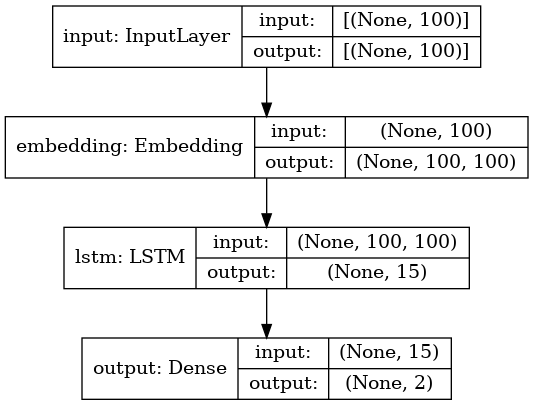

In [12]:
hyperparameters_2 = {
    'pX': X_train['normalize_comment'], 
    'py': y_train, 
    'pnum_words': 3000, 
    'pseq_length': 100,
    'pno_units': 15, 
    'pdropout': 0.3, 
    'pbatch_size': 32, 
    'pepochs': 10, 
    'psave_weights': './models/lstm_model_comments_2.h5'
}

model_2 = DeepModel.SentimentLSTM()
model_2.define(**hyperparameters_2)
model_2.model.summary()
plot_model(model_2.model, to_file='./images/lstm_model_comments_2.png', show_shapes=True, show_layer_names=True)

In [13]:
model_2.fit(**hyperparameters_2)

Epoch 1/10
320/320 [==============================] - 29s 81ms/step - loss: 0.4130 - accuracy: 0.8312 - val_loss: 0.3323 - val_accuracy: 0.8602
Epoch 2/10
320/320 [==============================] - 25s 79ms/step - loss: 0.2828 - accuracy: 0.8889 - val_loss: 0.3205 - val_accuracy: 0.8716
Epoch 3/10
320/320 [==============================] - 25s 77ms/step - loss: 0.2386 - accuracy: 0.9107 - val_loss: 0.3210 - val_accuracy: 0.8725
Epoch 4/10
320/320 [==============================] - 24s 76ms/step - loss: 0.2124 - accuracy: 0.9209 - val_loss: 0.3401 - val_accuracy: 0.8707
Epoch 5/10
320/320 [==============================] - 25s 77ms/step - loss: 0.1907 - accuracy: 0.9298 - val_loss: 0.3552 - val_accuracy: 0.8654
Epoch 6/10
320/320 [==============================] - 24s 74ms/step - loss: 0.1752 - accuracy: 0.9363 - val_loss: 0.3658 - val_accuracy: 0.8646
Epoch 7/10
320/320 [==============================] - 23s 72ms/step - loss: 0.1636 - accuracy: 0.9390 - val_loss: 0.3769 - val_accuracy:

In [14]:
!tensorboard --logdir ./tb_log_sentiment --port 6006

2021-10-29 22:24:59.870715: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2021-10-29 22:24:59.870745: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-10-29 22:25:01.069888: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-29 22:25:01.070465: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2021-10-29 22:25:01.070563: W tensorflow

In [15]:
prediction_2 = model_2.predict(X_test['normalize_comment'])
prediction_2

,input,output_proba,output_class
0,bán hàng kỉ quấn đầy đủ chất lượn...,"(7.5561167e-07, 0.9999993)",1
1,đặt xl áo ghi xl nhưng bé tí tẹo ngang ...,"(0.92751795, 0.07248204)",0
2,kẹp rất rất đẹp săn được giá sale h...,"(0.07028565, 0.9297143)",1
3,không nghĩ áo đẹp giao hàng nhanh không ...,"(0.13486566, 0.8651343)",1
4,hôm nay mới nhận được nhưng nhìn qua...,"(0.9999882, 1.1852359e-05)",0
...,...,...,...
2837,đặt dây buộc tóc nhưng chỉ nhận đưo...,"(0.9999896, 1.0315402e-05)",0
2838,chất vải đẹp có vẻ mát giao hàng nhanh...,"(0.00067545846, 0.99932456)",1
2839,dây nhìn tạm không đẹp mắc sai dây pha...,"(0.99999, 1.001526e-05)",0
2840,quần đẹp chất lượng ok nhưng chữ cu...,"(0.981992, 0.018007934)",0


              precision    recall  f1-score   support

    Negative       0.86      0.86      0.86      1410
    Positive       0.86      0.86      0.86      1432

    accuracy                           0.86      2842
   macro avg       0.86      0.86      0.86      2842
weighted avg       0.86      0.86      0.86      2842



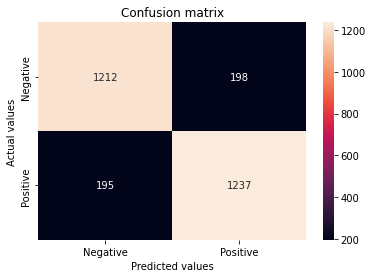

In [16]:
Model.confusionMatrix(y_test, prediction_2['output_class'])

In [17]:
model_uw_2 = DeepModel.SentimentLSTM()
model_uw_2.define(**hyperparameters_2)
model_uw_2.model.load_weights("./models/lstm_model_comments_2/weights/02-0.320474.h5")

In [18]:
prediction_uw_2 = model_uw_2.predict(X_test['normalize_comment'])
prediction_uw_2

,input,output_proba,output_class
0,bán hàng kỉ quấn đầy đủ chất lượn...,"(0.00043627014, 0.99956375)",1
1,đặt xl áo ghi xl nhưng bé tí tẹo ngang ...,"(0.9958728, 0.004127209)",0
2,kẹp rất rất đẹp săn được giá sale h...,"(0.115075, 0.88492507)",1
3,không nghĩ áo đẹp giao hàng nhanh không ...,"(0.012311526, 0.9876885)",1
4,hôm nay mới nhận được nhưng nhìn qua...,"(0.8120184, 0.18798164)",0
...,...,...,...
2837,đặt dây buộc tóc nhưng chỉ nhận đưo...,"(0.997141, 0.0028590155)",0
2838,chất vải đẹp có vẻ mát giao hàng nhanh...,"(0.0035439562, 0.99645597)",1
2839,dây nhìn tạm không đẹp mắc sai dây pha...,"(0.99527293, 0.004727039)",0
2840,quần đẹp chất lượng ok nhưng chữ cu...,"(0.74641526, 0.2535847)",0


              precision    recall  f1-score   support

    Negative       0.86      0.89      0.88      1410
    Positive       0.89      0.86      0.87      1432

    accuracy                           0.87      2842
   macro avg       0.88      0.87      0.87      2842
weighted avg       0.88      0.87      0.87      2842



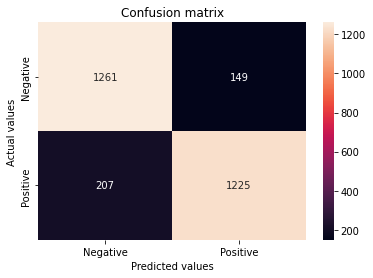

In [19]:
Model.confusionMatrix(y_test, prediction_uw_2['output_class'])

In [21]:
model_1.save("./models/lstm_model_comments_1/lstm_model_comments_1.h5", "./models/lstm_model_comments_1/lstm_tokenizer_comments_1.pickle")
model_uw_1.save("./models/lstm_model_comments_1/lstm_model_comments_uw_1.h5", "./models/lstm_model_comments_1/lstm_tokenizer_comments_uw_1.pickle")


<keras_preprocessing.text.Tokenizer object at 0x7f4d3aa8a460> has been saved at ./models/lstm_model_comments_1/lstm_tokenizer_comments_1.pickle.
📢 Model has been saved at ./models/lstm_model_comments_1/lstm_model_comments_1.h5 - Tokenizer has been saved at ./models/lstm_model_comments_1/lstm_tokenizer_comments_1.pickle.
<keras_preprocessing.text.Tokenizer object at 0x7f4d3ae7a430> has been saved at ./models/lstm_model_comments_1/lstm_tokenizer_comments_uw_1.pickle.
📢 Model has been saved at ./models/lstm_model_comments_1/lstm_model_comments_uw_1.h5 - Tokenizer has been saved at ./models/lstm_model_comments_1/lstm_tokenizer_comments_uw_1.pickle.


In [22]:
model_2.save("./models/lstm_model_comments_2/lstm_model_comments_2.h5", "./models/lstm_model_comments_2/lstm_tokenizer_comments_2.pickle")
model_uw_2.save("./models/lstm_model_comments_2/lstm_model_comments_uw_2.h5", "./models/lstm_model_comments_2/lstm_tokenizer_comments_uw_2.pickle")

<keras_preprocessing.text.Tokenizer object at 0x7f4e093d01f0> has been saved at ./models/lstm_model_comments_2/lstm_tokenizer_comments_2.pickle.
📢 Model has been saved at ./models/lstm_model_comments_2/lstm_model_comments_2.h5 - Tokenizer has been saved at ./models/lstm_model_comments_2/lstm_tokenizer_comments_2.pickle.
<keras_preprocessing.text.Tokenizer object at 0x7f4e09444cd0> has been saved at ./models/lstm_model_comments_2/lstm_tokenizer_comments_uw_2.pickle.
📢 Model has been saved at ./models/lstm_model_comments_2/lstm_model_comments_uw_2.h5 - Tokenizer has been saved at ./models/lstm_model_comments_2/lstm_tokenizer_comments_uw_2.pickle.


In [26]:
def get_params():
    pbatch_size = np.random.choice(np.arange(5, 100, 10))
    pnum_words = np.random.choice(np.arange(2000, 3000, 10))
    optimizers = np.random.choice(['rmsprop', 'adam', 'adadelta'])
    pdropout = np.random.choice(np.linspace(0.1, 0.5, 10))
    pno_units = np.random.choice(np.arange(10, 50, 10))
    pseq_length = np.random.choice(np.arange(50, 200, 10))
    
    return {
        'pX': X_train['normalize_comment'], 
        'py': y_train, 
        'pnum_words': pnum_words, 
        'pseq_length': pseq_length,
        'pno_units': pno_units, 
        'pdropout': pdropout, 
        'poptimizers': optimizers,
        'pbatch_size': pbatch_size, 
        'pepochs': 10, 
        'psave_weights': './models/lstm_model_comments_3.h5'
    }

In [27]:
def try_params(**kwargs):
    model = DeepModel.SentimentLSTM()
    model.define(**kwargs)
    model.fit(**kwargs)

    return {"loss": model.evaluation()}

In [28]:
hb = DeepModel.Hyperband(get_params, try_params)
results = hb.run()

print(results)


*** 81 configurations x 1.0 iterations each

1 | Fri Oct 29 19:48:53 2021 | lowest loss so far: inf (run -1)

Epoch 1/10
137/137 [==============================] - 17s 108ms/step - loss: 0.5406 - accuracy: 0.7995 - val_loss: 0.4038 - val_accuracy: 0.8461
Epoch 2/10
137/137 [==============================] - 15s 106ms/step - loss: 0.3273 - accuracy: 0.8843 - val_loss: 0.3485 - val_accuracy: 0.8637
Epoch 3/10
137/137 [==============================] - 15s 113ms/step - loss: 0.2686 - accuracy: 0.9052 - val_loss: 0.3341 - val_accuracy: 0.8619
Epoch 4/10
137/137 [==============================] - 16s 113ms/step - loss: 0.2398 - accuracy: 0.9155 - val_loss: 0.3449 - val_accuracy: 0.8628
Epoch 5/10
137/137 [==============================] - 16s 115ms/step - loss: 0.2176 - accuracy: 0.9246 - val_loss: 0.3456 - val_accuracy: 0.8637
Epoch 6/10
137/137 [==============================] - 16s 113ms/step - loss: 0.2084 - accuracy: 0.9256 - val_loss: 0.3573 - val_accuracy: 0.8619
Epoch 7/10
137/137 

Chúng ta hoàn toàn có thể tối ưu hóa cho các HYper Parameter, nhưng nhìn chung rất có thể lỗi hiện tại của chúng ta là **variance error**, tức lỗi từ dữ liệu chứ không phải **bias error**.

Điều nữa là việc tối ưu hóa tham số cho một Deep Neural Network là rất tốn công sức, nhưng nhóm vẫn muốn trình bày một kĩ thuật là HyperBand, đây là bài báo của tác giả [https://arxiv.org/pdf/1603.06560.pdf](https://arxiv.org/pdf/1603.06560.pdf). Ý tưởng chính của phương pháp này là với $n$ HyperParameters set ban đầu được lấy từ GridSearch gồm $m$ hyperparameters set ($n < m$) do ta định nghĩa. Ta sẽ tiến hành train và đánh giá bằng một vài phép toán, qua các lần đào tạo trên từng model, ta chọn ra các model có hiệu suất tốt nhất và loại bỏ các model có performance thấp hơn (nhờ các phép toán thống kê và xác suất). Tiếp theo, người ta tiến hành cải thiện weight trên các model còn sót lại. Cứ như thế số model còn tồn tại sau cùng của quá trình là các model tốt nhất. Tuy nhiên nếu data của ta không tốt thì khi áp dụng phương pháp này sẽ gây ra overfitting.

Đây là một model phân lớp dữ liệu MNIST có sử dụng phương pháp hyperband này để tối ưu hóa tham số, và với một tập dữ liệu đẹp như MNIST thì phương pháp này cực kì ổn. [https://github.com/PacktPublishing/Deep-Learning-Quick-Reference/tree/master/Chapter06](https://github.com/PacktPublishing/Deep-Learning-Quick-Reference/tree/master/Chapter06)